<a href="https://colab.research.google.com/github/yuhsiangwu/CIFAR-10_CNN/blob/main/1082990deep_learning_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interact, IntSlider, BoundedIntText

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
# Reshape size of each image from (28, 28) to (28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# Normalize data range
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [ ]:
model = Sequential()

In [ ]:
# [第一層] 第一層卷積層，注意：卷積層指定輸入資料的格式
model.add(Conv2D(128, (3, 3), input_shape=(28, 28, 1), activation='relu'))
#我想要Dropout
model.add(Dropout(rate=0.1))
# [第二層] 池化層
model.add(MaxPool2D()) 
# [第三層] 第二層卷積層
model.add(Conv2D(64, (3, 3), activation='relu'))
#我想要Dropout
model.add(Dropout(rate=0.125))
# [第四層] 池化層
model.add(MaxPool2D()) 
model.add(Conv2D(32, (3, 3), activation='relu'))
#我想要Dropout
model.add(Dropout(rate=0.125))
# [第四層] 池化層
model.add(MaxPool2D()) 
# [第五層] 扁平層
model.add(Flatten()) 
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.15))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.15))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))
# [第八層] 輸出層
model.add(Dense(10, activation='softmax'))

### 編譯模型: 設定模型訓練時的設定

- Optimizer: Stochastic Gradient Descent (SGD)
- Loss: categorical cross-entropy 

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='SGD', 
              metrics=['categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 dropout_49 (Dropout)        (None, 26, 26, 128)       0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 dropout_50 (Dropout)        (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                 

### 訓練模型: 透過訓練模型來學習分類資料的函數

In [ ]:
training_history = model.fit(X_train, y_train, 
                             batch_size=32, 
                             epochs=30,  
                             validation_data=(X_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 13s 7ms/step - loss: 1.8027 - categorical_accuracy: 0.2967 - val_loss: 1.1363 - val_categorical_accuracy: 0.5823
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 1.0434 - categorical_accuracy: 0.5849 - val_loss: 0.8234 - val_categorical_accuracy: 0.7020
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8093 - categorical_accuracy: 0.6937 - val_loss: 0.6845 - val_categorical_accuracy: 0.7465
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7249 - categorical_accuracy: 0.7273 - val_loss: 0.6419 - val_categorical_accuracy: 0.7668
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6691 - categorical_accuracy: 0.7490 - val_loss: 0.5977 - val_categorical_accuracy: 0.7776
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6344 - categorical_accuracy: 0.7645 - val_loss: 0.5664 - val_categorical_accu

### 訓練過程的評估

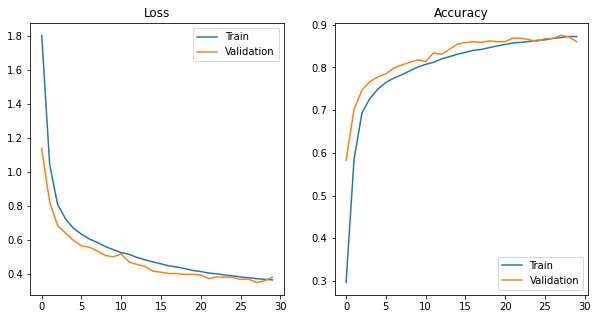

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(training_history.history['categorical_accuracy'])
plt.plot(training_history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Validation'])
plt.title("Accuracy");

In [ ]:
# prediction result on testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("測試資料 loss: %f" %test_loss)
print("測試資料準確率: %f" %test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3821 - categorical_accuracy: 0.8597
測試資料 loss: 0.382097
測試資料準確率: 0.859700


## 5: 視覺化預測結果

在這部分，我們提供簡單的視覺化方法來呈現神經網路的輸入與輸出結果

In [ ]:
def visulization(idx):
    # Random pick one data from training set
    # idx = np.random.randint(X_train.shape[0])
    sample_x = X_test[idx]
    sample_y = y_test[idx]
    # Predict the class of random data
    predict_y = model.predict(X_test[idx:idx+1]).squeeze()
    predict_label = predict_y.argmax()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    # Plot raw image
    ax1.imshow(sample_x[:, :, 0], 'gray_r')
    ax1.set_title("Image Label: %d" %sample_y.argmax())

    # Plot prediction probability of each classes
    ax2.barh(np.arange(10), predict_y)
    ax2.patches[predict_label].set_facecolor('Red')
    ax2.set_title("Prediction Result: %d" %predict_label);
    if sample_y.argmax()==predict_y.argmax():
        print("預測正確!")
    else:
        print("預測失敗QQ")

In [ ]:
#請修改下面一行的value值(0到9999)
interact(visulization, idx=BoundedIntText(value=938, min=0, max=X_test.shape[0]-1));

interactive(children=(BoundedIntText(value=938, description='idx', max=9999), Output()), _dom_classes=('widget…